<a href="https://colab.research.google.com/github/Tiwari666/NLP/blob/main/Amazon_NLP_Customer_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

from bs4 import BeautifulSoup
import requests
import time
import datetime

import smtplib


<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->

<script type='text/javascript'>var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'>
<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">
<link rel="dns-prefetch" href="https://m.media-amazon.com">
<link rel="dns-prefetch" href="https://completion.amazon.com">
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type='text/javascript'>
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function
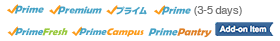

In [ ]:
# Connect to Website and pull in data

url = 'https://www.amazon.com/Lenovo-IdeaPad-Laptop-Microsoft-Quad-Core/dp/B0BY5VQGSR/ref=sr_1_1_sspa?crid=DCXTSGQQYXP8&keywords=laptop&qid=1707611587&sprefix=laptop%2Caps%2C116&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&th=1'
response = requests.get(url)
print(response.text)

In [ ]:
page = requests.get(url)

In [ ]:
page

<Response [200]>

In [ ]:
page.content

#Note:
if we go to the webpage, right click on the page and select the "view page source", we get the same content as the "page.content" snippet gives us. It is difficult to get the content from there.So,..

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{
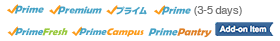

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

#Note:

We get a better results for the page content. However, it is not enough better to extract the required componwnts, such as price, name of the reviewer, name of the product etc....

LET'S GET EACH REQUIRED COMPONENT ONE-BY-ONE.



STEP1:Go to the webpage.

Step2: Select only the  name of the first reviewer.

STEP3: Right click on the name of the reviewer/desired component to be extracted and click on "inspect".

A new dialogbox will open.

STEP4: on the newly opened dialog box, click on the "first left box with an aroow" on it

STEP5: Also, click on the same name of the reviewer/desired component to be extracted. Make sure yoy click on the name after you click on the "first left box with an aroow" on the left-top corner.

It will give the HTML code where the name was written.

You can see that the required name is in the "span" tag under the "class"--"a-profile-name".

STEP6: click on the name to be extracted "<span class="a-profile-name">Matthew A. Ray</span>" and hit the control C to copy it and on the following coding.

STEP 7: Let's define the new variable as "reviewers" as follows:



# Getting Reviewers' Name:

In [ ]:
reviewers = soup.find_all('span', class_ = 'a-profile-name')
reviewers

[<span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Matthew A. Ray</span>,
 <span class="a-profile-name">larry</span>,
 <span class="a-profile-name">K. Atkinson</span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">anom</span>,
 <span class="a-profile-name">liang</span>,
 <span class="a-profile-name">Corinne B</span>,
 <span class="a-profile-name">Maryann Fernandez</span>]

In [ ]:
len(reviewers)

10

#NOTE:

Some names like 'lilNlost' are repeated. So, we need to keep only unique names.
We will fix it later.

We only need names. So, let's collect only names from the previous output.



In [ ]:
cust_name = []
for i in range(0,len(reviewers)):
    cust_name.append(reviewers[i].get_text())
cust_name

['Amazon Customer',
 'Amazon Customer',
 'Matthew A. Ray',
 'larry',
 'K. Atkinson',
 'Amazon Customer',
 'anom',
 'liang',
 'Corinne B',
 'Maryann Fernandez']

# Removing the repeated names:


In [ ]:
cust_name=list(dict.fromkeys(cust_name))
cust_name

['Amazon Customer',
 'Matthew A. Ray',
 'larry',
 'K. Atkinson',
 'anom',
 'liang',
 'Corinne B',
 'Maryann Fernandez']

# Let's work for getting the review-star variable:

STEP1:Go to the webpage.

Step2: Select only the name of the first star.

STEP3: Right click on the name of the first star./desired component to be extracted and click on "inspect".

A new dialogbox will open.

STEP4: on the newly opened dialog box, click on the "first left box with an aroow" on it

STEP5: Also, click on the same name of  the first star./desired component to be extracted. Make sure yoy click on the name after you click on the "first left box with an aroow" on the left-top corner.

It will give the HTML code where the name was written.

You can see that the required name is in the "span" tag under the "class"--"a-icon-alt".

STEP6: click on the star to be extracted "5" star and hit the control C to copy it and on the following coding.

STEP 7: Let's define the new variable as "stars" as follows:

In [ ]:
stars = soup.select('i.review-rating span.a-icon-alt')
stars

[<span class="a-icon-alt">5.0 out of 5 stars</span>,
 <span class="a-icon-alt">5.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">5.0 out of 5 stars</span>,
 <span class="a-icon-alt">1.0 out of 5 stars</span>,
 <span class="a-icon-alt">5.0 out of 5 stars</span>,
 <span class="a-icon-alt">5.0 out of 5 stars</span>,
 <span class="a-icon-alt">3.0 out of 5 stars</span>]

In [ ]:
star_text = [float(t.text[0]) for t in stars]
star_text

[5.0, 5.0, 4.0, 5.0, 1.0, 5.0, 5.0, 3.0]

#  Get Review title

In [ ]:
titles = soup.select('a.review-title span:nth-of-type(2)')
titles

[<span>Great laptop for the price!</span>,
 <span>Finally a laptop that runs extremely well</span>,
 <span>My new foray into Windows 11, so far so good</span>,
 <span>Lenovo Laptop</span>,
 <span>decent but not the best</span>,
 <span>Good and not expensive.</span>,
 <span>Am pleased</span>,
 <span>Warranty expired, challenging to get it activated</span>]

In [ ]:
titles1 = []
for i in range(0,len(titles)):
    titles1.append(titles[i].get_text())
titles1

['Great laptop for the price!',
 'Finally a laptop that runs extremely well',
 'My new foray into Windows 11, so far so good',
 'Lenovo Laptop',
 'decent but not the best',
 'Good and not expensive.',
 'Am pleased',
 'Warranty expired, challenging to get it activated']

# Getting Reviews of Customers:

In [ ]:
# Find all span elements with data-hook='review-body', parent span tag
review_spans = soup.find_all('span', {'data-hook': 'review-body'})
review_spans[0]

<span class="a-size-base review-text" data-hook="review-body"><div class="a-expander-collapsed-height a-row a-expander-container a-expander-partial-collapse-container" data-a-expander-collapsed-height="300" data-a-expander-name="review_text_read_more" style="max-height:300px"><div aria-expanded="false" class="a-expander-content reviewText review-text-content a-expander-partial-collapse-content" data-hook="review-collapsed">
<span>I am very happy with this laptop.  I bought it for my daughter.  I didn't realize it came with Microsoft Windows S, which is a more secure version of the operating system and only allows you to install apps from the Microsoft Store.  There are some who would not enjoy this, but for our purposes, this is perfect.  I feel safer knowing that the applications I am installing have been vetted by Microsoft before I install them.  I think this is the perfect laptop to purchase for someone who is less technical and doesn't understand the importance of not clicking and

In [ ]:
len(review_spans)

8

In [ ]:
# Initialize an empty list to store the reviews
reviews = []

# Iterate over each found span
for span in review_spans:
    # Find all child span elements within each found span
    child_spans = span.find_all('span')

    # Check if there are at least two child spans
    if len(child_spans) >= 2:
        # Get the second child span (index 1) and extract its text content
        second_span_text = child_spans[0].get_text(strip=True)

        # Append the extracted text to the list of reviews
        reviews.append(second_span_text)
    else:
        # Handle the case where there is no second child span
        reviews.append("No second span found in the parent span.")

reviews

["I am very happy with this laptop.  I bought it for my daughter.  I didn't realize it came with Microsoft Windows S, which is a more secure version of the operating system and only allows you to install apps from the Microsoft Store.  There are some who would not enjoy this, but for our purposes, this is perfect.  I feel safer knowing that the applications I am installing have been vetted by Microsoft before I install them.  I think this is the perfect laptop to purchase for someone who is less technical and doesn't understand the importance of not clicking and installing everything under the sun.The laptop itself came with a Terrabyte of disk space (almost unheard of these days in lower priced laptops) and 20 Gigs of RAM (way more than usual in laptops of this price).I would purchase another of these in a heartbeat, if I needed to.",
 "I've had two different laptops from HP and ASUS  that ran extremely bad. They were junk new out of the box. This laptop from Lenovo runs very fast and

In [ ]:
len(reviews)

8


# Getting Prices:


In [ ]:
prices = soup.find_all('span', class_ = "a-price-whole")
prices

[<span class="a-price-whole">419<span class="a-price-decimal">.</span></span>,
 <span class="a-price-whole">15<span class="a-price-decimal">.</span></span>,
 <span class="a-price-whole">10<span class="a-price-decimal">.</span></span>,
 <span class="a-price-whole">479<span class="a-price-decimal">.</span></span>,
 <span class="a-price-whole">499<span class="a-price-decimal">.</span></span>,
 <span class="a-price-whole">339<span class="a-price-decimal">.</span></span>,
 <span class="a-price-whole">419<span class="a-price-decimal">.</span></span>,
 <span class="a-price-whole">429<span class="a-price-decimal">.</span></span>,
 <span class="a-price-whole">599<span class="a-price-decimal">.</span></span>,
 <span class="a-price-whole">419<span class="a-price-decimal">.</span></span>,
 <span class="a-price-whole">499<span class="a-price-decimal">.</span></span>,
 <span class="a-price-whole">499<span class="a-price-decimal">.</span></span>,
 <span class="a-price-whole">465<span class="a-price-d

In [ ]:
prices_list = []
for i in prices:
    prices_list.append(float(i.get_text()))
prices_list

[419.0,
 15.0,
 10.0,
 479.0,
 499.0,
 339.0,
 419.0,
 429.0,
 599.0,
 419.0,
 499.0,
 499.0,
 465.0,
 419.0]

# Getting Dates:

In [ ]:
# Find all span elements with data-hook='review-body', parent span tag
date_spans = soup.find_all('span', {'data-hook': 'review-date'})
date_spans

[<span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United States on January 27, 2024</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United States on April 8, 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United States on November 6, 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United States on February 1, 2024</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United States on January 31, 2024</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United States on January 27, 2024</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United States on November 15, 2023</span>,
 <span class="a-size-base a-c

In [ ]:
dates_list = []
for i in date_spans:
    dates_list.append(i.get_text()[33:])
dates_list

['January 27, 2024',
 'April 8, 2023',
 'November 6, 2023',
 'February 1, 2024',
 'January 31, 2024',
 'January 27, 2024',
 'November 15, 2023',
 'December 19, 2023']

# Combining all the extracted data into a dataframe:

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame({'Date of Review':dates_list,'Name of Reviewers':cust_name,'Rating out of 5':star_text,'Titles of Reviews':titles1,'Reviews':reviews})
df

Date of Review  Name of Reviewers  Rating out of 5  \
0   January 27, 2024    Amazon Customer              5.0   
1      April 8, 2023     Matthew A. Ray              5.0   
2   November 6, 2023              larry              4.0   
3   February 1, 2024        K. Atkinson              5.0   
4   January 31, 2024               anom              1.0   
5   January 27, 2024              liang              5.0   
6  November 15, 2023          Corinne B              5.0   
7  December 19, 2023  Maryann Fernandez              3.0   

                                   Titles of Reviews  \
0                        Great laptop for the price!   
1          Finally a laptop that runs extremely well   
2       My new foray into Windows 11, so far so good   
3                                      Lenovo Laptop   
4                            decent but not the best   
5                            Good and not expensive.   
6                                         Am pleased   
7  Warranty expired, challenging to get it activated   

                                             Reviews  
0  I am very happy with this laptop.  I bought it...  
1  I've had two different laptops from HP and ASU...  
2  This is my first new computer in about 7 or 8 ...  
3  I love the size and light weight. Very fast so...  
4  i bought this cause it said it was good for st...  
5  This 15.6  laptop  with 20GB RAM 1TB SSD, also...  
6  The laptop is not too heavy, has a large scree...  
7  Yes the first couple of months - very pleased ...

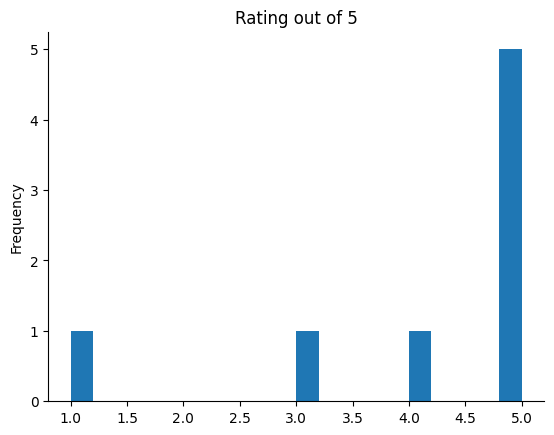

In [ ]:
# @title Rating out of 5

from matplotlib import pyplot as plt
df['Rating out of 5'].plot(kind='hist', bins=20, title='Rating out of 5')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.Reviews[1]

"I've had two different laptops from HP and ASUS  that ran extremely bad. They were junk new out of the box. This laptop from Lenovo runs very fast and smooth. Very fast boot up and fast opening the browser and other websites . What I did find out is the windows 11 is very difficult to use. It won't allow me to download printer programs from cannon.com. it makes me really mad that Microsoft stopped this low to prevent downloading programs you need for your printer. Microsoft says use their store to get needed programs. I tried that and still failed. Now I'm faced calling Microsoft for help and I shouldn't have to do that. To me windows 11 is a worthless program. The computer itself is really great. In the end, what it amounts to is Microsoft holds your computer at ransom . Apple doesn't use this tactic from what I've read about Mac computers. Mac computers has several programs that are used to scan anything you download. Why doesn't Microsoft provide the protections when you need to do

# **Getting each data from all pages**

In [ ]:
dates_list = []
cust_name = []
star_text = []
titles1 = []
reviews = []

for page in range(1, 6):
    url = 'https://www.amazon.com/Lenovo-IdeaPad-Laptop-Microsoft-Quad-Core/dp/B0BY5VQGSR/ref=sr_1_1_sspa?crid=DCXTSGQQYXP8&keywords=laptop&qid=1707611587&sprefix=laptop%2Caps%2C116&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&th=' + str(page)

    my_url = requests.get(url)
    if str(my_url) == "<Response [200]>":
        soup = BeautifulSoup(my_url.content, 'html.parser')

        date_spans = soup.find_all('span', {'data-hook': 'review-date'})#list of 8 tags
        reviewers = soup.find_all('span', class_='a-profile-name')#list of 8 tags
        ratings = soup.select('i.review-rating span.a-icon-alt')#list of 8 tags
        titles = soup.select('a.review-title span:nth-of-type(2)')#list of 8 tags
        review_spans = soup.find_all('span', {'data-hook': 'review-body'})#list of 8 tags

        for i in range(len(date_spans)):#i=0 means first tag in the list of tags
            dates_list.append(date_spans[i].get_text()[33:])
            cust_name.append(reviewers[i].get_text())
            star_text.append(float(ratings[i].get_text()[:3]))
            titles1.append(titles[i].get_text())

            # Extract review from the first child span tag
            review_child_spans = review_spans[i].find_all('span')
            if review_child_spans:
                reviews.append(review_child_spans[0].get_text().strip())
            else:
                reviews.append("")  # Handle case where no review found

In [ ]:
str( my_url) == "<Response [200]>"

True

In [ ]:
if str( my_url) == "<Response [200]>":
    df=pd.DataFrame({'Date of Review':dates_list,'Name of Reviewers':cust_name,'Rating out of 5':star_text,'Titles of Reviews':titles1,'Reviews':reviews})
df

Date of Review Name of Reviewers  Rating out of 5  \
0    January 27, 2024   Amazon Customer              5.0   
1       April 8, 2023   Amazon Customer              5.0   
2    November 6, 2023    Matthew A. Ray              4.0   
3    February 1, 2024             larry              5.0   
4    January 31, 2024       K. Atkinson              1.0   
5    January 27, 2024   Amazon Customer              5.0   
6   November 15, 2023              anom              5.0   
7   December 19, 2023             liang              3.0   
8    January 27, 2024   Amazon Customer              5.0   
9       April 8, 2023   Amazon Customer              5.0   
10   November 6, 2023    Matthew A. Ray              4.0   
11   February 1, 2024             larry              5.0   
12   January 31, 2024       K. Atkinson              1.0   
13   January 27, 2024   Amazon Customer              5.0   
14  November 15, 2023              anom              5.0   
15  December 19, 2023             liang              3.0   
16   January 27, 2024   Amazon Customer              5.0   
17      April 8, 2023   Amazon Customer              5.0   
18   November 6, 2023    Matthew A. Ray              4.0   
19   February 1, 2024             larry              5.0   
20   January 31, 2024       K. Atkinson              1.0   
21   January 27, 2024   Amazon Customer              5.0   
22  November 15, 2023              anom              5.0   
23  December 19, 2023             liang              3.0   
24   January 27, 2024   Amazon Customer              5.0   
25      April 8, 2023   Amazon Customer              5.0   
26   November 6, 2023    Matthew A. Ray              4.0   
27   February 1, 2024             larry              5.0   
28   January 31, 2024       K. Atkinson              1.0   
29   January 27, 2024   Amazon Customer              5.0   
30  November 15, 2023              anom              5.0   
31  December 19, 2023             liang              3.0   
32   January 27, 2024   Amazon Customer              5.0   
33      April 8, 2023   Amazon Customer              5.0   
34   November 6, 2023    Matthew A. Ray              4.0   
35   February 1, 2024             larry              5.0   
36   January 31, 2024       K. Atkinson              1.0   
37   January 27, 2024   Amazon Customer              5.0   
38  November 15, 2023              anom              5.0   
39  December 19, 2023             liang              3.0   

                                    Titles of Reviews  \
0                         Great laptop for the price!   
1           Finally a laptop that runs extremely well   
2        My new foray into Windows 11, so far so good   
3                                       Lenovo Laptop   
4                             decent but not the best   
5                             Good and not expensive.   
6                                          Am pleased   
7   Warranty expired, challenging to get it activated   
8                         Great laptop for the price!   
9           Finally a laptop that runs extremely well   
10       My new foray into Windows 11, so far so good   
11                                      Lenovo Laptop   
12                            decent but not the best   
13                            Good and not expensive.   
14                                         Am pleased   
15  Warranty expired, challenging to get it activated   
16                        Great laptop for the price!   
17          Finally a laptop that runs extremely well   
18       My new foray into Windows 11, so far so good   
19                                      Lenovo Laptop   
20                            decent but not the best   
21                            Good and not expensive.   
22                                         Am pleased   
23  Warranty expired, challenging to get it activated   
24                        Great laptop for the price!   
25          Finally a laptop that runs extremely well   
26     

In [ ]:
df.Reviews[39]

'Yes the first couple of months - very pleased with the purchased even though laptop did not have a lot of internal memory.3 months in, keyboard not working, including virtual keyboard and plugging in external keyboard. Called Lenovo, they checked my serial number and it turns out the warranty had expired. I explain that I bought it new and am now trying to get an invoice from seller, which they do not provide.Still trying to make my case to Lenovo, otherwise I will need to pay $70 for premium support. This laptop may not end up being the great deal I thought I was getting.'